In [47]:
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install fastai==0.7.0

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.24.2)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.16.2)


** DS-420 - Project **

- Quang Lam
- Thu Pham

In [0]:
# Import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fastai.structured import add_datepart

# Linear Regression
from sklearn.linear_model import LinearRegression

# k-Nearest Neighbors
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Long-term Memory
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Data Initialization

In [0]:
# Config
symbl = 'MSFT'
apiKey = 'DG33STQB6CAUHK3B'

# Fetch Historical Data
df = pd.read_csv('https://www.alphavantage.co/query?datatype=csv&function=TIME_SERIES_WEEKLY&symbol=' + symbl + '&outputsize=compact&apikey=' + apiKey)

# Setting index as date
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d')
df.index = df['timestamp']

# Data Overview

In [50]:
# Get general statistics
df.describe()

,open,high,low,close,volume
count,1109.00000,1109.000000,1109.000000,1109.000000,1.109000e+03
mean,49.63532,51.147858,48.233323,49.816130,2.280722e+08
std,29.84560,31.002752,28.806366,30.150289,1.169885e+08
min,15.20000,16.400000,14.870000,15.280000,1.984389e+07
25%,27.06000,27.620000,26.600000,27.140000,1.405655e+08
50%,35.59000,36.290000,34.350000,35.670000,2.116416e+08
75%,64.99000,66.350000,63.480000,64.980000,2.956390e+08
max,175.44000,180.380000,163.130000,178.130000,8.797232e+08


In [51]:
# Get data types
df.dtypes

timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
dtype: object

In [52]:
# Check top 10 rows
df.head(10)

,timestamp,open,high,low,close,volume
timestamp,,,,,,
2019-04-01,2019-04-01,118.95,119.1085,118.1000,119.02,19843893
2019-03-29,2019-03-29,116.56,118.7050,115.5215,117.94,119632716
2019-03-22,2019-03-22,116.17,120.8200,116.0500,117.05,160388610
2019-03-15,2019-03-15,110.99,117.2500,110.9800,115.91,173532134
2019-03-08,2019-03-08,113.02,113.2500,108.8000,110.51,111990712
2019-03-01,2019-03-01,111.76,113.2400,110.8800,112.53,119359497
2019-02-22,2019-02-22,107.79,111.2000,106.2900,110.97,96472580
2019-02-15,2019-02-15,106.20,108.3000,104.9650,108.22,110757176
2019-02-08,2019-02-08,102.87,107.2700,102.7700,105.67,130472196


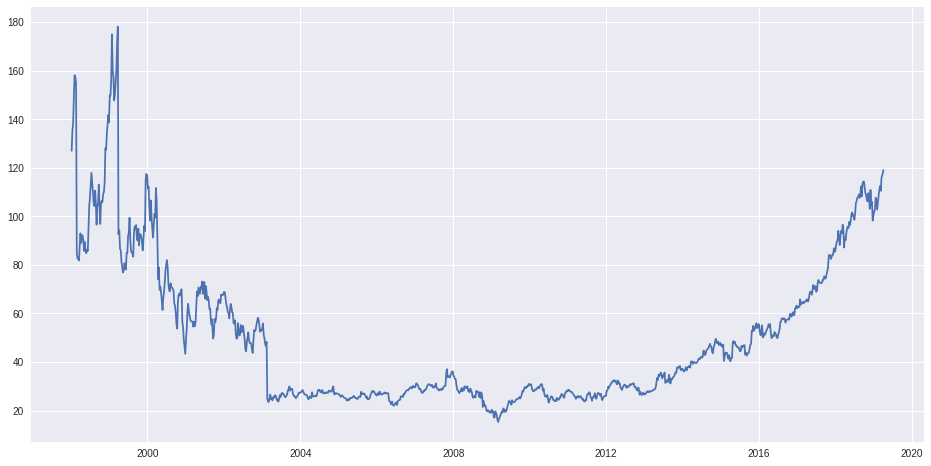

In [53]:
# Plotting closing price
plt.figure(figsize=(16,8))
plt.plot(df['close'])

In [54]:
# Check last 10 rows
df.tail(10)

,timestamp,open,high,low,close,volume
timestamp,,,,,,
1998-03-13,1998-03-13,82.50,83.00,79.50,82.37,55001400
1998-03-06,1998-03-06,85.87,85.87,79.25,82.75,79005300
1998-02-27,1998-02-27,80.94,86.00,79.37,84.75,95642150
1998-02-20,1998-02-20,158.50,158.50,152.88,155.13,40268500
1998-02-13,1998-02-13,158.75,160.06,155.63,157.50,37262800
1998-02-06,1998-02-06,151.75,158.75,150.50,158.13,42349700
1998-01-30,1998-01-30,139.88,150.13,138.45,149.19,46856000
1998-01-23,1998-01-23,134.13,139.88,134.00,138.25,46621800
1998-01-16,1998-01-16,124.62,135.38,124.37,135.25,40459900


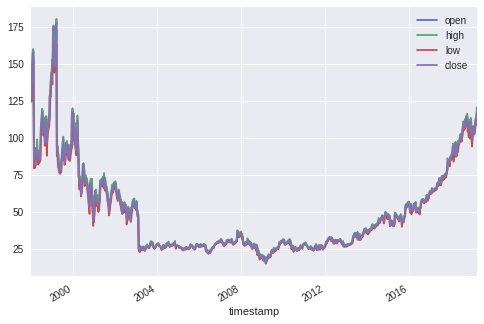

In [55]:
# Plotting price movement
df.plot(kind = "line", y = ['open', 'high', 'low','close'])

## Linear Regression

In [0]:
# PREPARE TRAIN SET & TEST SET

# Remove other rows, keep only timestamp and close
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(data)), columns=['timestamp', 'close'])

for i in range(0, len(data)):
  new_data['timestamp'][i] = data['timestamp'][i]
  new_data['close'][i] = data['close'][i]
  
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'], format='%Y-%m-%d')
new_data.index = new_data['timestamp']
add_datepart(new_data, 'timestamp')
  
# Split dataset into test and train portion
# 80% to train, 20% to test
train_set_size = int(len(new_data) * 0.8)
train_set = new_data[:train_set_size]
test_set = new_data[train_set_size:]

x_train = train_set.drop('close', axis=1)
y_train = train_set['close']
x_test = test_set.drop('close', axis=1)
y_test = test_set['close']

In [57]:
# Implement linear regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
# Make predictions and find the rmse
preds = linear_model.predict(x_test)
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

74.6920290190791

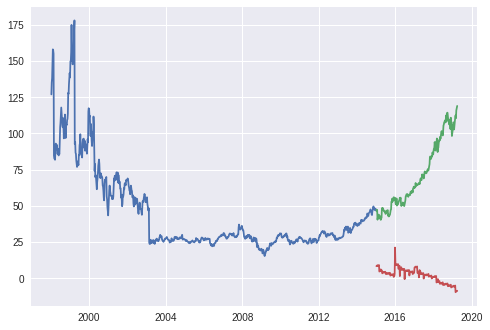

In [59]:
# Plot linear regression results
predicted_set = test_set.copy()
predicted_set['predictions'] = preds

plt.plot(train_set['close'])
plt.plot(predicted_set[['close', 'predictions']])

## k-Nearest Neighbours

In [0]:
# PREPARE TRAIN SET & TEST SET

# Remove other rows, keep only timestamp and close
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(data)), columns=['timestamp', 'close'])

for i in range(0, len(data)):
  new_data['timestamp'][i] = data['timestamp'][i]
  new_data['close'][i] = data['close'][i]
  
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'], format='%Y-%m-%d')
new_data.index = new_data['timestamp']
add_datepart(new_data, 'timestamp')
  
# Split dataset into test and train portion
# 80% to train, 20% to test
train_set_size = int(len(new_data) * 0.8)
train_set = new_data[:train_set_size]
test_set = new_data[train_set_size:]

x_train = train_set.drop('close', axis=1)
y_train = train_set['close']
x_test = test_set.drop('close', axis=1)
y_test = test_set['close']

In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))

#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
knearest_neighbors_model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
knearest_neighbors_model.fit(x_train,y_train)
preds = knearest_neighbors_model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
#rmse
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

53.57766745045088

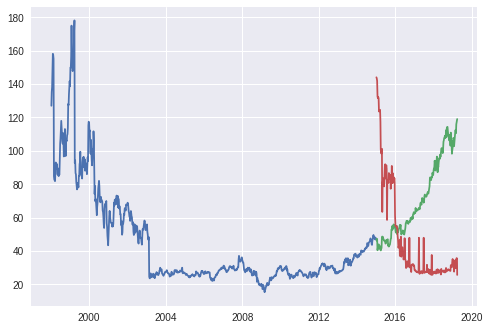

In [63]:
# Plot linear regression results
predicted_set = test_set.copy()
predicted_set['predictions'] = preds

plt.plot(train_set['close'])
plt.plot(predicted_set[['close', 'predictions']])

## Long Short Term Memory (LSTM)




In [64]:
# Creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['timestamp', 'close'])
for i in range(0,len(data)):
    new_data['timestamp'][i] = data['timestamp'][i]
    new_data['close'][i] = data['close'][i]

# Setting index
new_data.index = new_data['timestamp']
new_data.drop('timestamp', axis=1, inplace=True)

# Creating train and test sets
dataset = new_data.values
train_set_size = int(len(new_data) * 0.8)

train = dataset[0:train_set_size,:]
valid = dataset[train_set_size:,:]

# Converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

# predicting the test data, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

 - 46s - loss: 0.0030


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
 - 46s - loss: 0.0031


In [65]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

4.721769347427234

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


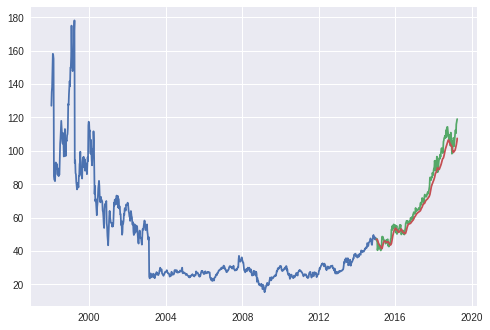

In [66]:
#for plotting
train_set_size = int(len(new_data) * 0.8)
train = new_data[:train_set_size]
valid = new_data[train_set_size:]
valid['predictions'] = closing_price
plt.plot(train['close'])
plt.plot(valid[['close','predictions']])